In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from FlappyAgents.abst_flappy_agent import FlappyAgent
from FlappyAgents.qlearning_flappy_agent import QlearningAgent
import playyy

pygame 2.1.2 (SDL 2.0.18, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
#######################################
# RUN THIS TO RESET LEARNING PROGRESS #
#######################################

agent: FlappyAgent = QlearningAgent()
trainedlvl = -1

results = []
trainingsizes = []
qvalues = []
times = []
frames = []

In [63]:

playsize = 25
i = 0
stepsize = 100
for i in range(0, 50000 + 1, stepsize):
	if trainedlvl < i:
		_start = int(time() * 1000)
		# SETUP
		#agent: FlappyAgent = DeepQAgent()

		start = int(time() * 1000)
		_frames = playyy.train(stepsize, agent)
		duration = int(time() * 1000) - start
		# write(agent, filestr)

		#vals = read("results/qvalues_4000")
		#print(filestr)
		#vals = read(filestr)
		#agent.q_values = vals

		#print(len(agent.q_values))
		start2 = int(time() * 1000)
		rundata = playyy.run_game(playsize, agent)
		duration2 = int(time() * 1000) - start2

		
		results.append(rundata)

		
		# for result in results:
		# 	sum = 0
		# 	for v in result:
		# 		sum = sum + v
		# 	result_sums.append(sum)

		# 	mini.append(np.min(result))
		# 	result_q1.append(np.quantile(result, 0.25))
		# 	result_q2.append(np.quantile(result, 0.5))
		# 	result_q3.append(np.quantile(result, 0.75))
		# 	maxi.append(np.max(result))
		frames.append(_frames)
		trainingsizes.append(i)	
		qvalues.append(len(agent.q_values))
		times.append(duration)
		trainedlvl = i
	
		_duration = int(time() * 1000) - start
		print(i, _duration / 1000, duration / 1000, duration2 / 1000)

6700 23.257 8.593 14.664
6800 26.109 7.618 18.491


In [53]:
result_sums = []
mean = []

mini = []
result_q1 = []
result_q2 = []
result_q3 = []
maxi = []

# result magic
for result in results:
	result_sums.append(np.sum(result))
	mean.append(np.mean(result))

	mini.append(np.min(result))
	result_q1.append(np.quantile(result, 0.25))
	result_q2.append(np.quantile(result, 0.5))
	result_q3.append(np.quantile(result, 0.75))
	maxi.append(np.max(result))

# frames magic
masterframes = []
s: int = 0
for frame in frames:
	for f in frame:
		s = s + f
	masterframes.append(s)

print(len(result_sums))
print(len(trainingsizes))

framedf = pd.DataFrame({})
framedf

df = pd.DataFrame({'trainingsizes': trainingsizes, "frames": frames, "masterframes": masterframes, "results": results, 'result_sums': result_sums, "mean": mean, "qvalues": qvalues, "times": times, "mini": mini, "result_q1": result_q1, "result_q2": result_q2, "result_q3": result_q3, "maxi": maxi})
df



66
66


,trainingsizes,frames,masterframes,results,result_sums,mean,qvalues,times,mini,result_q1,result_q2,result_q3,maxi
0,0,"[60, 59, 58, 62, 60, 62, 57, 62, 62, 62, 58, 6...",6141,"[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-500.0,-5.00,499,1523,-5.0,-5.00,-5.0,-5.00,-5.0
1,100,"[62, 60, 68, 62, 55, 62, 62, 63, 62, 62, 62, 6...",12306,"[-5.0, -4.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5....",-480.0,-4.80,689,1196,-5.0,-5.00,-5.0,-5.00,-4.0
2,200,"[62, 55, 62, 62, 62, 62, 62, 72, 62, 57, 68, 6...",18673,"[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-473.0,-4.73,863,1137,-5.0,-5.00,-5.0,-4.00,-4.0
3,300,"[62, 62, 62, 62, 62, 62, 63, 76, 75, 62, 62, 6...",25024,"[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-481.0,-4.81,1040,1102,-5.0,-5.00,-5.0,-5.00,-4.0
4,400,"[50, 62, 49, 67, 62, 62, 70, 62, 55, 62, 62, 9...",31545,"[-4.0, -5.0, -4.0, -2.0, -2.0, -4.0, -3.0, -5....",-444.0,-4.44,1230,1146,-5.0,-5.00,-5.0,-4.00,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,6100,"[699, 247, 247, 146, 324, 134, 324, 98, 304, 4...",1345263,"[18.0, 18.0, 84.0, 7.0, 5.0, 25.0, 14.0, 12.0,...",1843.0,18.43,4976,8207,-3.0,2.75,12.0,26.00,87.0
62,6200,"[514, 247, 1377, 63, 67, 663, 1377, 213, 255, ...",1397235,"[16.0, 215.0, 288.0, 39.0, 131.0, 296.0, 17.0,...",12994.0,129.94,4983,11301,-4.0,38.50,101.5,194.25,927.0
63,6300,"[66, 134, 475, 474, 360, 296, 211, 134, 627, 4...",1440588,"[5.0, 54.0, 210.0, 1.0, 105.0, 21.0, 49.0, 32....",2941.0,29.41,4996,9561,-4.0,4.50,18.0,43.25,210.0
64,6400,"[62, 324, 437, 211, 401, 290, 141, 247, 1228, ...",1484665,"[263.0, 46.0, 120.0, 197.0, 50.0, 293.0, 220.0...",17554.0,175.54,5003,9113,-4.0,47.50,121.0,261.00,699.0


In [54]:
# df = pd.read_table("savepoint.csv", sep=",", index_col=[0]) 
# df

[Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Mean score of 100 attempts vs. Number of training iterations')]

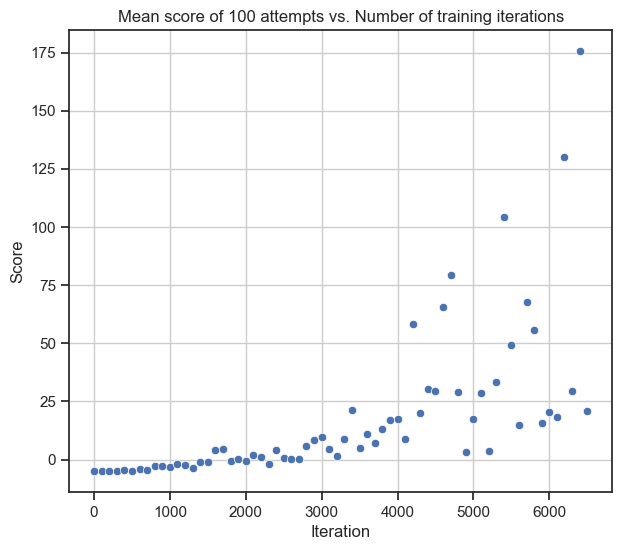

In [60]:
from matplotlib.pyplot import xlabel


# sns.color_palette("tab10")


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)



# sns.scatterplot(data=df, x="trainingsizes", y="mini", palette="vlag")
# ax.set(ylabel="Score", xlabel="Iteration", title="Minimum score of 100 attempts vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q1", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q2", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

sns.scatterplot(data=df, x="trainingsizes", y="mean", palette="vlag")
ax.set(ylabel="Score", xlabel="Iteration", title="Mean score of 100 attempts vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="result_q3", palette="vlag")
# ax.set(ylabel="", xlabel="Iteration", title=" vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="maxi", palette="vlag")
# ax.set(ylabel="Score", xlabel="Iteration", title="Maximum score of 100 attempts vs. Number of training iterations")



# sns.scatterplot(data=df, x="trainingsizes", y="times", palette="vlag")
# ax.set(ylabel="Duration in milliseconds", xlabel="Iteration", title="Training duration of vs. Number of training iterations")

# sns.scatterplot(data=df, x="trainingsizes", y="qvalues", palette="vlag")
# ax.set(ylabel="Number of q-values", xlabel="Iteration", title="Entries of q-values vs. Number of training iterations")

# ax.set_yscale("log")
# sns.scatterplot(data=df, x="masterframes", y="mean", palette="vlag")
# ax.set(ylabel="Score", xlabel="Frames", title="Mean score of 100 attempts vs. Number of frames during training")


In [56]:
# df.to_csv('savepoint.csv') 
# filestr: str = 'results/qvalues_' + str(trainedlvl)
# playyy.write(agent, filestr)